<a href="https://colab.research.google.com/github/Amangaud1205/House_Price_Prediction/blob/main/HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HousePricePrediction.xlsx to HousePricePrediction.xlsx


In [ ]:
# loading the data from csv file to Pandas DataFrame
data = pd.read_excel("HousePricePrediction.xlsx")

In [ ]:
data.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [ ]:
data.shape

(2919, 13)

In [ ]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


Data Preprocessing

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

Categorical variables: 4


In [ ]:
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

Integer variables: 6


In [ ]:
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Float variables: 3


Exploratory Data Analysis

<ipython-input-67-d84174c41335>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cbar=True,annot = True, cmap='coolwarm')


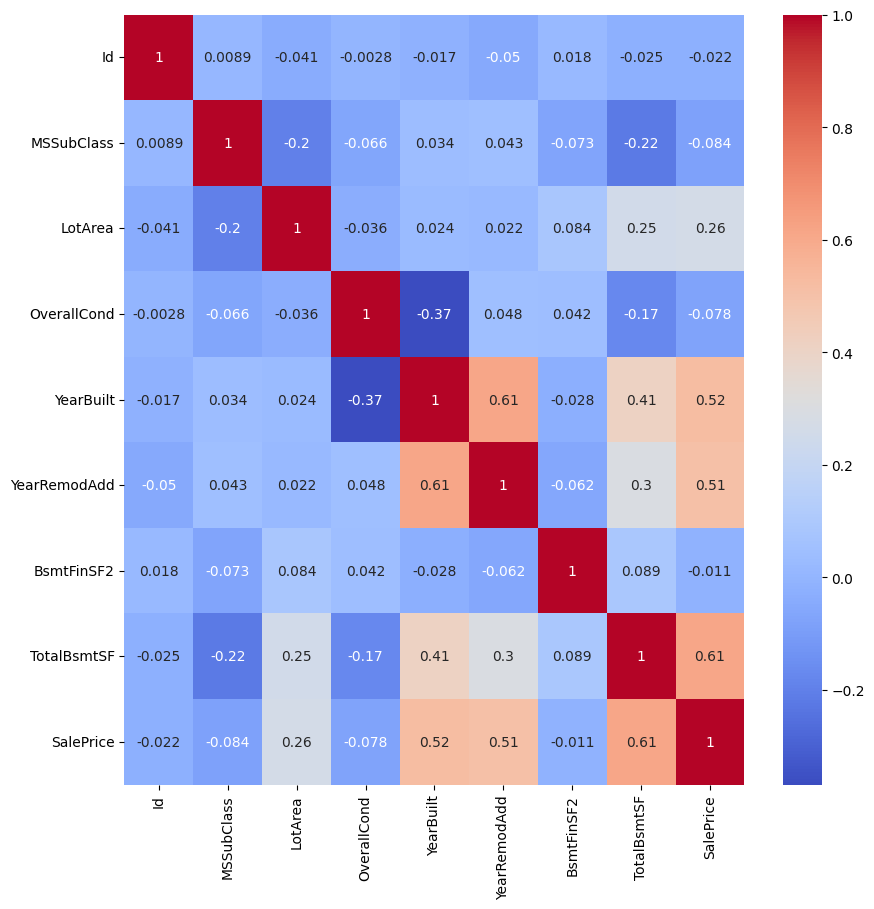

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),cbar=True,annot = True, cmap='coolwarm')
plt.show()

 Analyze the different categorical features.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

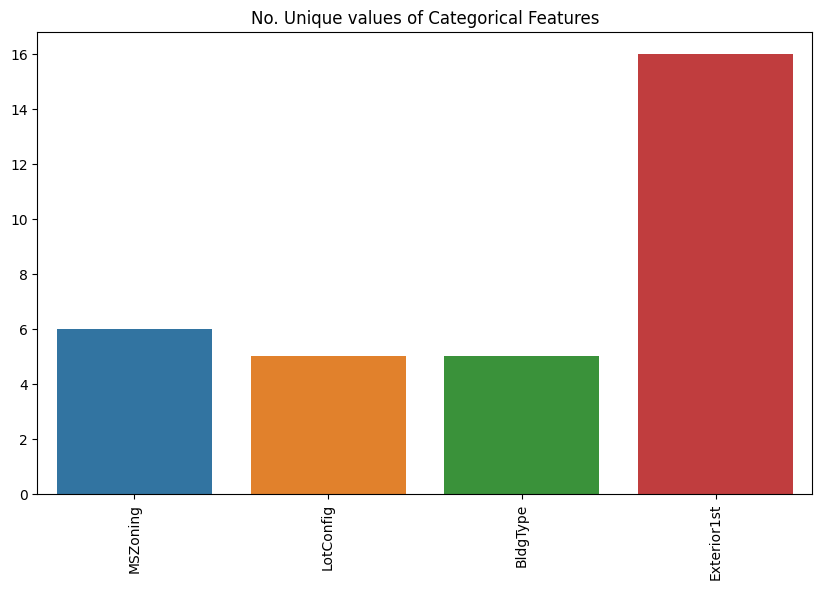

In [ ]:
unique_values = []
for col in object_cols:
  unique_values.append(data[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

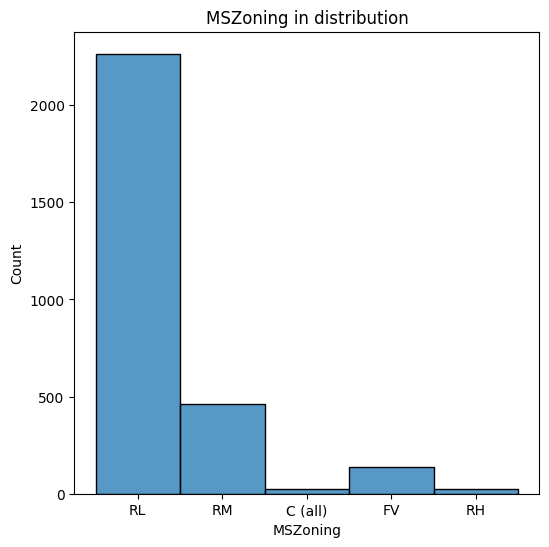

In [ ]:
# MSZoning distribution
plt.figure(figsize=(6,6))
sns.histplot(data['MSZoning'])
plt.title('MSZoning in distribution')
plt.show()

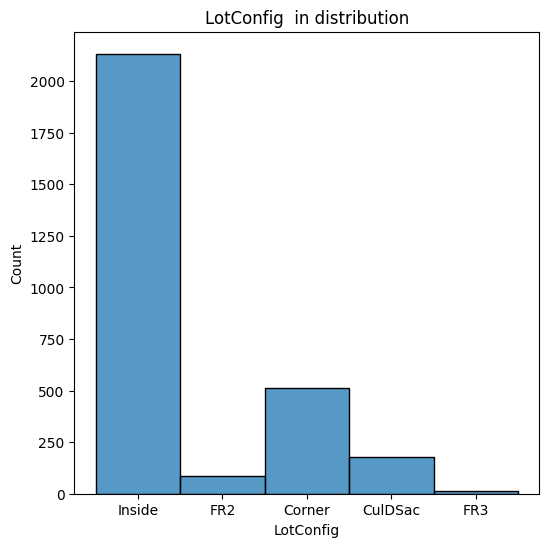

In [ ]:
# LotConfig distribution
plt.figure(figsize=(6,6))
sns.histplot(data['LotConfig'])
plt.title('LotConfig  in distribution')
plt.show()

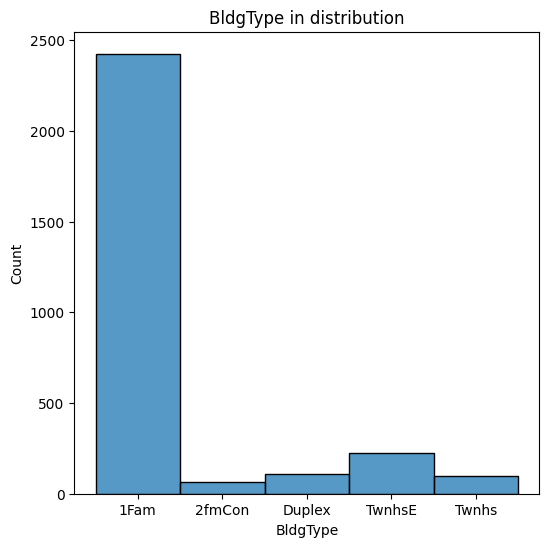

In [ ]:
# BldgType distribution
plt.figure(figsize=(6,6))
sns.histplot(data['BldgType'])
plt.title('BldgType in distribution')
plt.show()

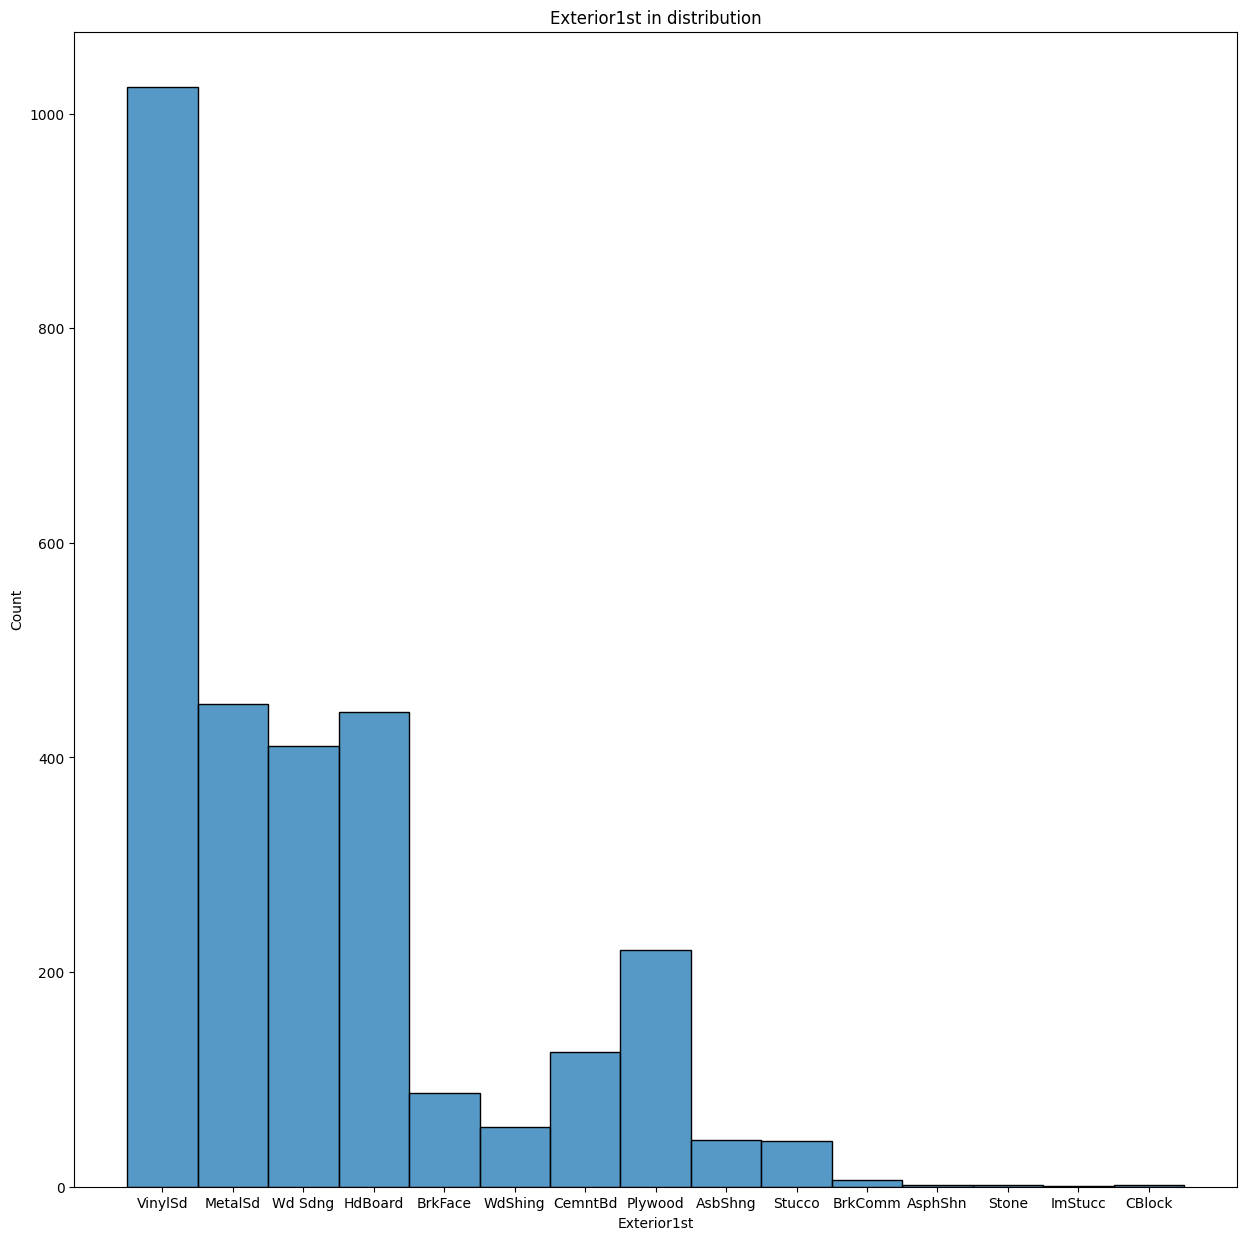

In [ ]:
# Exterior1st  distribution
plt.figure(figsize=(15,15))
sns.histplot(data['Exterior1st'])
plt.title('Exterior1st in distribution')
plt.show()

In [ ]:
data.drop(['Id'],axis=1,inplace=True)

In [ ]:
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())

In [ ]:
new_data = data.dropna()

In [ ]:
new_data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

s = (new_data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [ ]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_data[object_cols]))
OH_cols.index = new_data.index
df_final = new_data.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from re import X
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

x = df_final.drop(['SalePrice'], axis=1)
y = df_final['SalePrice']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4, test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1165, 37) (583, 37) (1165,) (583,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
regressor = XGBRegressor()
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# prediction on testing data
training_data_prediction = regressor.predict(x_train)

In [ ]:
training_data_prediction

array([ 91160.336, 179149.23 , 156973.94 , ..., 120508.85 , 146802.38 ,
       158995.34 ], dtype=float32)

In [ ]:
testing_data_prediction = regressor.predict(x_test)

In [ ]:
testing_data_prediction

array([184186.   , 254789.98 , 195923.78 , 162901.48 , 237847.3  ,
       190957.72 ,  96277.9  , 160604.3  , 177665.17 , 207013.7  ,
       160018.6  , 241836.25 , 153282.25 , 165865.44 , 193119.69 ,
       163738.33 , 123116.44 , 180500.14 , 205990.58 , 182546.7  ,
       185515.58 , 153548.2  , 216420.39 , 159427.77 , 114471.72 ,
       167217.64 , 157797.17 , 152634.33 , 216478.78 , 141194.36 ,
       150962.75 , 189255.4  , 165966.27 , 173405.81 , 177669.72 ,
       184082.89 , 149090.34 , 168831.92 , 162157.03 , 207308.97 ,
       206092.83 , 222073.92 , 180971.22 , 144516.56 , 170726.06 ,
       243280.52 , 193256.97 ,  80259.87 , 174250.23 , 184086.11 ,
       209183.   , 190681.92 , 203203.72 , 135217.23 , 183880.98 ,
       168338.06 , 185397.03 , 217746.27 , 160200.16 , 205235.73 ,
       198173.55 , 139056.66 , 162276.3  , 165515.72 , 156268.16 ,
       181203.03 , 152842.95 , 116603.41 , 173122.3  , 160617.36 ,
       148127.25 , 179557.1  , 179639.78 , 226591.42 , 182856.